In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [2]:
df = pd.read_csv("dataset (1).csv")

df.head()


,Mess_ID,Date,Weekly_Crowd,Is_Holiday,Temperature,Menu_Score,Event_Intensity_Index,Stress_Level
0,1,5/2/2010,16437,0,42.31,2.428,7.04,8.106
1,1,12/2/2010,16420,1,38.51,2.452,7.04,8.106
2,1,19-02-2010,16120,0,39.93,2.486,7.04,8.106
3,1,26-02-2010,14097,0,46.63,2.439,7.04,8.106
4,1,5/3/2010,15548,0,46.50,2.375,7.05,8.106


In [3]:
# Convert 'Date' column to datetime format (handles different formats)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)

df = df.sort_values(by='Date')

df[['Date', 'Weekly_Crowd']].head()



,Date,Weekly_Crowd
0,2010-02-05,16437
5434,2010-02-05,12306
3718,2010-02-05,18743
2717,2010-02-05,24014
3003,2010-02-05,10330


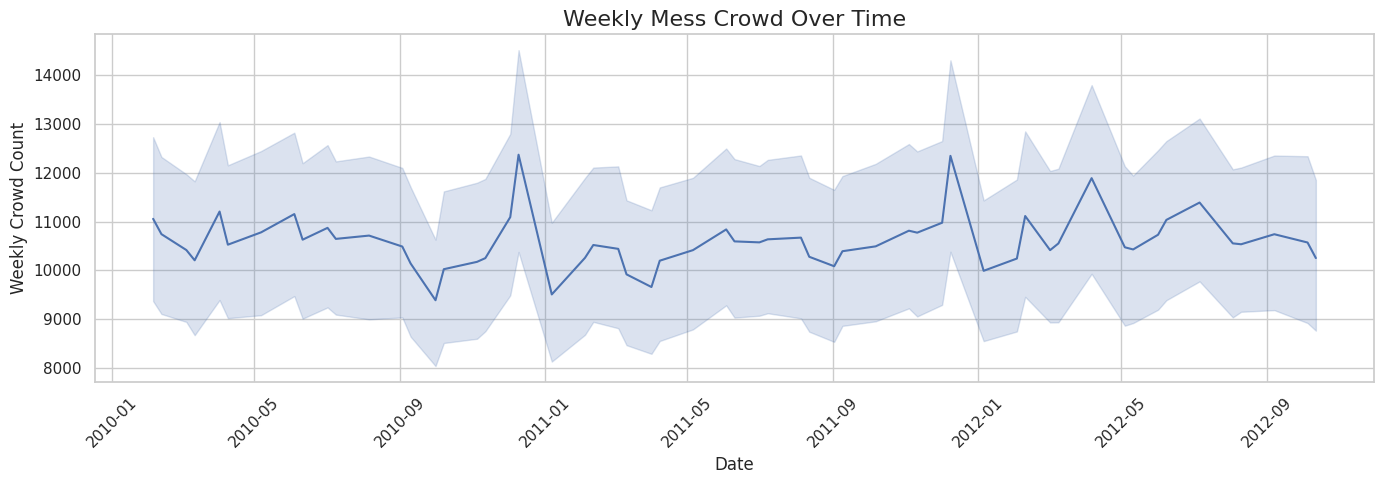

In [4]:
# Plot the Weekly Crowd over time
plt.figure(figsize=(14, 5))
sns.lineplot(data=df, x='Date', y='Weekly_Crowd')
plt.title('Weekly Mess Crowd Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Weekly Crowd Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
# Check correlation of each column with Weekly_Crowd
correlation = df.corr(numeric_only=True)['Weekly_Crowd'].sort_values(ascending=False)
print("Correlation with Weekly Crowd:\n")
print(correlation)

Correlation with Weekly Crowd:

Weekly_Crowd             1.000000
Is_Holiday               0.036891
Menu_Score              -0.009464
Temperature             -0.063811
Event_Intensity_Index   -0.072654
Stress_Level            -0.106176
Mess_ID                 -0.335331
Name: Weekly_Crowd, dtype: float64


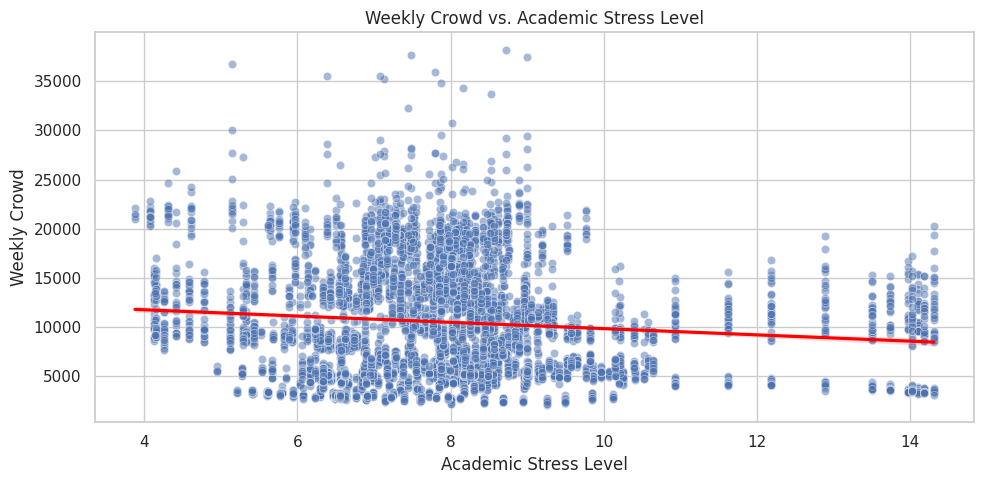

In [6]:
# Plot crowd vs. academic stress level
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Stress_Level', y='Weekly_Crowd', alpha=0.5)
sns.regplot(data=df, x='Stress_Level', y='Weekly_Crowd', scatter=False, color='red')
plt.title('Weekly Crowd vs. Academic Stress Level')
plt.xlabel('Academic Stress Level')
plt.ylabel('Weekly Crowd')
plt.tight_layout()
plt.show()


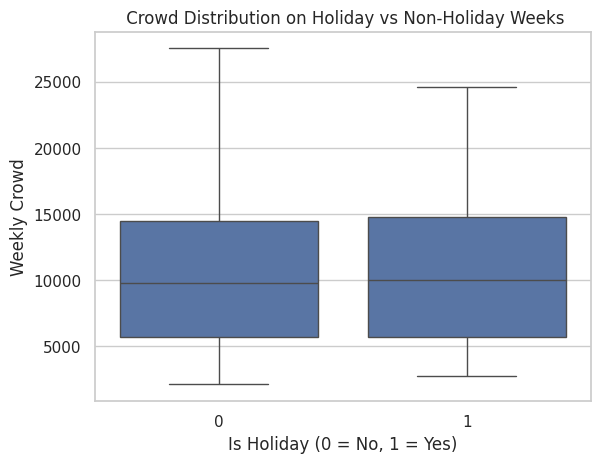

In [35]:
sns.boxplot(x='Is_Holiday', y='Weekly_Crowd', data=df)
plt.title(" Crowd Distribution on Holiday vs Non-Holiday Weeks")
plt.xlabel("Is Holiday (0 = No, 1 = Yes)")
plt.ylabel("Weekly Crowd")
plt.show()


/tmp/ipython-input-36-3851740319.py:5: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


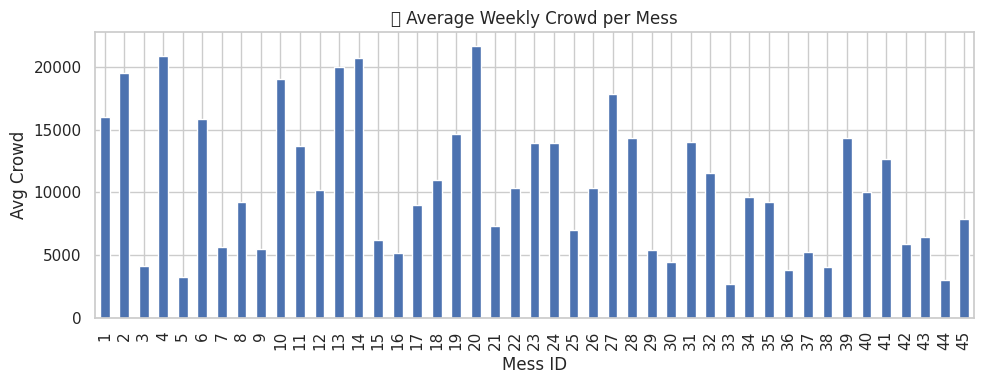

In [36]:
df.groupby('Mess_ID')['Weekly_Crowd'].mean().plot(kind='bar', figsize=(10,4))
plt.title("🏢 Average Weekly Crowd per Mess")
plt.xlabel("Mess ID")
plt.ylabel("Avg Crowd")
plt.tight_layout()
plt.show()

<Axes: >

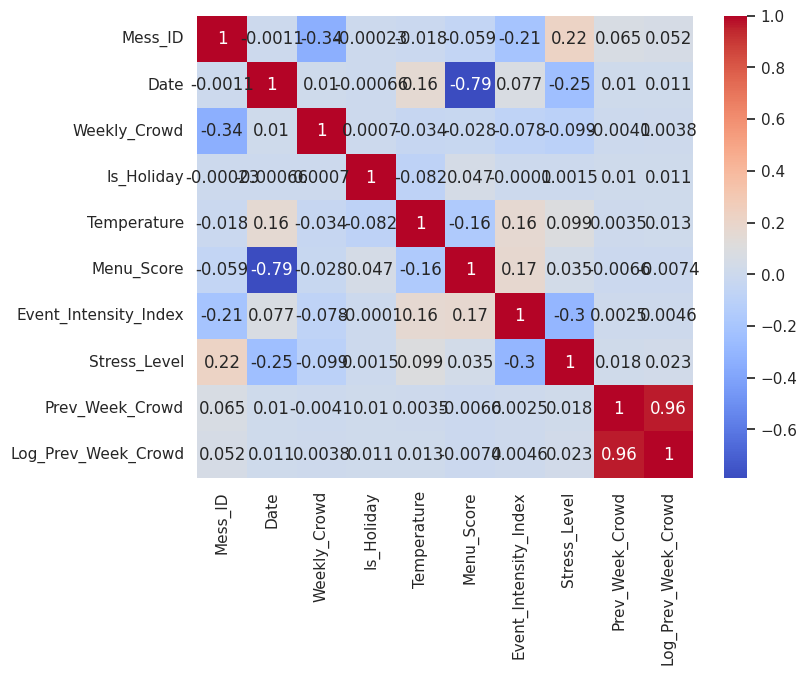

In [37]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


In [22]:
features = [
    'Is_Holiday',
    'Menu_Score',
    'Event_Intensity_Index',
    'Stress_Level',
    'Mess_ID',
    'Temperature'
]

X = df[features]
y = np.log1p(df['Weekly_Crowd'])  # keep target log-transformed


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)
model.fit(X_train, y_train)

y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)

mae = mean_absolute_error(y_test_actual, y_pred)
r2 = r2_score(y_test_actual, y_pred)

print(f"📈 Model Performance with Temperature:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")


📈 Model Performance with Temperature:
Mean Absolute Error (MAE): 601.78
R² Score: 0.9714


In [61]:
custom_input = {
    'Is_Holiday': 0,
    'Menu_Score': 2.375,
    'Event_Intensity_Index': 7.05,
    'Stress_Level': 8.106,
    'Mess_ID': 1,
    'Temperature': 46.5
}

custom_df = pd.DataFrame([custom_input])

log_pred = model.predict(custom_df)
predicted_crowd = np.expm1(log_pred[0])

match = df[
    (df['Is_Holiday'] == custom_input['Is_Holiday']) &
    (df['Menu_Score'] == custom_input['Menu_Score']) &
    (df['Event_Intensity_Index'] == custom_input['Event_Intensity_Index']) &
    (df['Stress_Level'] == custom_input['Stress_Level']) &
    (df['Mess_ID'] == custom_input['Mess_ID']) &
    (df['Temperature'] == custom_input['Temperature'])
]

if not match.empty:
    actual_crowd = int(match['Weekly_Crowd'].values[0])
    print(f"✅ Actual Crowd     : {actual_crowd}")
else:
    print("⚠️ Exact match for actual data not found in dataset.")

print(f"🔮 Predicted Crowd  : {int(predicted_crowd)} people")


✅ Actual Crowd     : 15548
🔮 Predicted Crowd  : 15626 people


In [68]:
custom_input = {
    'Is_Holiday': 0,
    'Menu_Score': 2.038,
    'Event_Intensity_Index': 4.21,
    'Stress_Level': 10.115,
    'Mess_ID': 33,
    'Temperature': 58.4
}

custom_df = pd.DataFrame([custom_input])

log_pred = model.predict(custom_df)
predicted_crowd = np.expm1(log_pred[0])

match = df[
    (df['Is_Holiday'] == custom_input['Is_Holiday']) &
    (df['Menu_Score'] == custom_input['Menu_Score']) &
    (df['Event_Intensity_Index'] == custom_input['Event_Intensity_Index']) &
    (df['Stress_Level'] == custom_input['Stress_Level']) &
    (df['Mess_ID'] == custom_input['Mess_ID']) &
    (df['Temperature'] == custom_input['Temperature'])
]

if not match.empty:
    actual_crowd = int(match['Weekly_Crowd'].values[0])
    print(f"✅ Actual Crowd     : {actual_crowd}")
else:
    print("⚠️ Exact match for actual data not found in dataset.")

print(f"🔮 Predicted Crowd  : {int(predicted_crowd)} people")


✅ Actual Crowd     : 2746
🔮 Predicted Crowd  : 2891 people


In [69]:
custom_input = {
    'Is_Holiday': 0,
    'Menu_Score': 2.038,
    'Event_Intensity_Index': 4.21,
    'Stress_Level': 5.115,
    'Mess_ID': 33,
    'Temperature': 58.4
}

custom_df = pd.DataFrame([custom_input])

log_pred = model.predict(custom_df)
predicted_crowd = np.expm1(log_pred[0])

match = df[
    (df['Is_Holiday'] == custom_input['Is_Holiday']) &
    (df['Menu_Score'] == custom_input['Menu_Score']) &
    (df['Event_Intensity_Index'] == custom_input['Event_Intensity_Index']) &
    (df['Stress_Level'] == custom_input['Stress_Level']) &
    (df['Mess_ID'] == custom_input['Mess_ID']) &
    (df['Temperature'] == custom_input['Temperature'])
]

if not match.empty:
    actual_crowd = int(match['Weekly_Crowd'].values[0])
    print(f"✅ Actual Crowd     : {actual_crowd}")
else:
    print("⚠️ Exact match for actual data not found in dataset.")

print(f"🔮 Predicted Crowd  : {int(predicted_crowd)} people")


⚠️ Exact match for actual data not found in dataset.
🔮 Predicted Crowd  : 2590 people
